# To understand what a RGB/RGBA channel is, we have to dip drive into the image infrastructure first which is actually digital composition.

Over here, we try to make a sort of sense of understanding how differentiation of number/digit with respective to the channel makes different colors and transparency.

In this article, we try to get some hand on experience. To do so, we need to read CSV file and have to call some library as well.

In [1]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
one = pd.read_csv("One.csv",index_col=["INDEX"])
one

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16
INDEX,,,,,,,,,,,,,,,,
Row1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Row2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Row3,0,0,0,0,0,0,0,225,225,0,0,0,0,0,0,0
Row4,0,0,0,0,0,0,0,225,225,0,0,0,0,0,0,0
Row5,0,0,0,0,0,0,225,225,225,225,0,0,0,0,0,0
Row6,0,0,0,0,0,225,225,225,225,225,0,0,0,0,0,0
Row7,0,0,0,0,225,225,225,225,225,225,0,0,0,0,0,0
Row8,0,0,0,225,225,225,225,225,225,225,0,0,0,0,0,0
Row9,0,0,225,225,225,0,225,225,225,225,0,0,0,0,0,0


What we see, a 28x16 matrix having value 0 or 225.  One more insight, out of the matrix values 225 number/ digit having a shape of ONE.  
With our naked eyes, We may consider it as an IMAGE of ONE SIZED Height 28 & Weight 16.    

Let's get started, now it's time to play with numbers. For convenience, we covert this matrix as a (28x16) numpy array. 

In [3]:
array = np.array(one, dtype=np.uint8)
print(array)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225 225   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225 225   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0 225 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0 225 225 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225 225 225   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225 225   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0 

Looks sounds good, right.

What if we consider it as an IMAGE representing with the values (0 ,225) and two colored image Black & White. Black & White Image basically a gray scale image. Zero represent Black and 225 represent White. What about other values between 0 – 225. We will discuss it later on. Now we will see, 28x16 matrix having value 0 or 225 in a image form how it looks like.  

pil_Image Shape : (28, 16)
pil_Image dtype : uint8
pil_Image size : 448


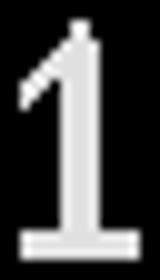

In [46]:
pil_Image = Image.fromarray(array)
print("pil_Image Shape :",array.shape)
print("pil_Image dtype :",array.dtype)
print("pil_Image size :",array.size)
pil_Image.resize((160,280))

In [58]:
blackwhite = pd.read_csv("blackwhite.csv",index_col=["INDEX"])
blackwhite

ValueError: Index INDEX invalid

In [4]:
array = np.array(one, dtype=np.uint8)
print(array.shape)
print(array.dtype)
print(array)

(28, 16)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225 225   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225 225   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0 225 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0 225 225 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225 225 225   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225 225   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0  

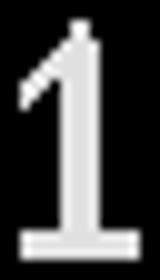

In [35]:
pilimage = Image.fromarray(array,mode="L")
pilimage.resize((160,280))

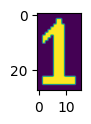

In [33]:
plt.figure(figsize=(1,1))
plt.imshow(pilimage)

In [7]:
arrayPixelValeOne= np.where(array==0,0,128).astype(np.uint8)
print(arrayPixelValeOne.shape)
print(arrayPixelValeOne.dtype)
print(arrayPixelValeOne)


(28, 16)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 128 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 128 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0 128 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0 128 128 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0 128 128 128 128 128 128 128   0   0   0   0   0   0]
 [  0   0 128 128 128   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0 128 128   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0 128   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 128 128 128   0  

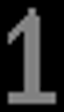

In [31]:
pilimage1 = Image.fromarray(arrayPixelValeOne, mode="L")
pilimage1.resize((64,112))

In [9]:
pilimage1.mode

'L'

In [10]:
arrayPixelValeOne1= np.where(array==0,0,50).astype(np.uint8)
print(arrayPixelValeOne1.shape)
print(arrayPixelValeOne1.dtype)
print(arrayPixelValeOne1)

(28, 16)
uint8
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 50 50  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 50 50  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0 50 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0 50 50 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0 50 50 50 50 50 50 50  0  0  0  0  0  0]
 [ 0  0 50 50 50  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0 50 50  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0 50  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50 50 50 50  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [11]:
arr = np.dstack((array, arrayPixelValeOne1, arrayPixelValeOne1))
arr

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [225,  50,  50],
        ...,
        [225,  50,  50],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [30]:
pilimage = Image.fromarray(arr)
pilimage.resize((64,112))

ValueError: Too many dimensions: 3 > 2.

In [13]:
arr.shape

(28, 16, 3)

In [14]:
arrayPixelVale53= np.where(array==0,0,15).astype(np.uint8)
print(arrayPixelVale53.shape)
print(arrayPixelVale53.dtype)
print(arrayPixelVale53)

(28, 16)
uint8
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15 15  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15 15  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0 15 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0 15 15 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0 15 15 15 15 15 15 15  0  0  0  0  0  0]
 [ 0  0 15 15 15  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0 15 15  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0 15  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15 15 15 15  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [15]:
arrayPixelVale94= np.where(array==0,0,225).astype(np.uint8)
print(arrayPixelVale94.shape)
print(arrayPixelVale94.dtype)
print(arrayPixelVale94)

(28, 16)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225 225   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225 225   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0 225 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0 225 225 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225 225 225   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225 225   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0  

In [16]:
arrayPixelVale59= np.where(array==0,0,80).astype(np.uint8)
print(arrayPixelVale59.shape)
print(arrayPixelVale59.dtype)
print(arrayPixelVale59)

(28, 16)
uint8
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 80 80  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 80 80  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0 80 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0 80 80 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0 80 80 80 80 80 80 80  0  0  0  0  0  0]
 [ 0  0 80 80 80  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0 80 80  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0 80  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 80 80 80 80  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [17]:
arrayPixelVale1= np.where(array==1,1,1).astype(np.uint8)
print(arrayPixelVale1.shape)
print(arrayPixelVale1.dtype)
print(arrayPixelVale1)

(28, 16)
uint8
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [18]:
arrr = np.dstack((arrayPixelVale1,arrayPixelVale53, arrayPixelVale94,arrayPixelVale59))
arrr

array([[[  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0],
        ...,
        [  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0]],

       [[  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0],
        ...,
        [  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0]],

       [[  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0],
        ...,
        [  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0]],

       ...,

       [[  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,  15, 225,  80],
        ...,
        [  1,  15, 225,  80],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0]],

       [[  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0],
        ...,
        [  1,   0,   0,   0],
        [  1,   0,   0,   0],
        [  1,   0,   0,   0]],

       [[  1

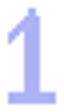

In [19]:
pilimage = Image.fromarray(arrr)
pilimage.resize((64,112))

In [20]:
from PIL import Image

with Image.open("1.png") as im:
    print(im.getbands())  # Returns ('R', 'G', 'B')
    R, G, B, A = im.split()

('R', 'G', 'B', 'A')


In [21]:
import os

In [22]:
os.getcwd()

'D:\\mlearning\\numberVSimage'

In [23]:
a= Image.open("1.png")
type(a)

PIL.PngImagePlugin.PngImageFile

In [24]:
b=np.array(a)
b[100][0]

array([0, 0, 0, 0], dtype=uint8)

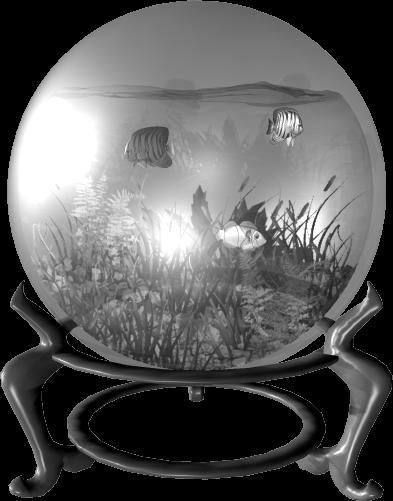

In [25]:
R

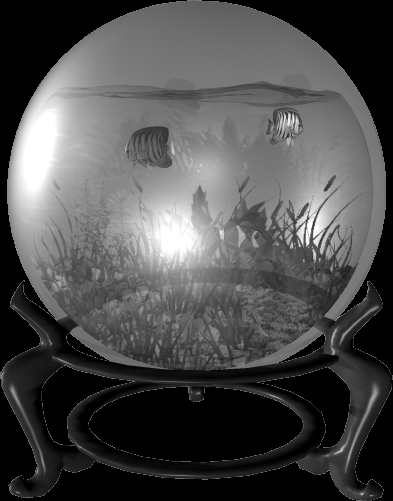

In [26]:
G

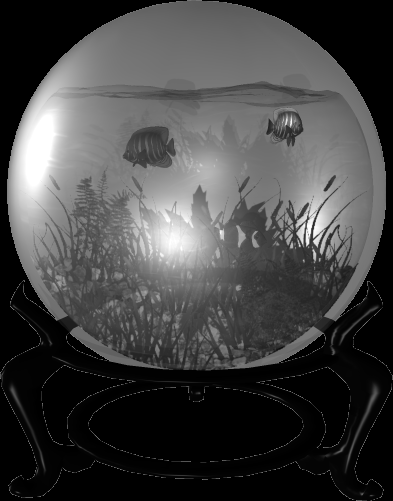

In [27]:
B

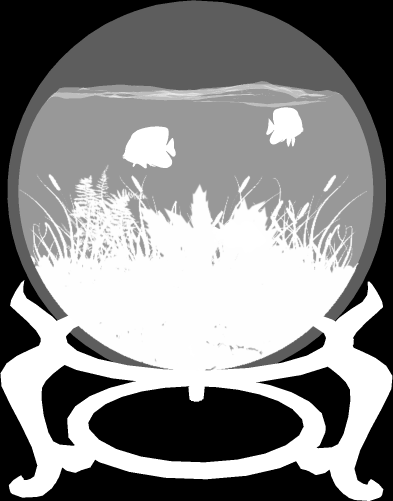

In [28]:
A

In [29]:
cc= np.array(R)
cc[0]
print(R)

<PIL.Image.Image image mode=L size=393x501 at 0x1ECEBCB5490>
